# Download & Clean Data

In [137]:
!wget https://raw.githubusercontent.com/FortumAI/ActivitiesHub/main/salary_dataset.csv

--2024-07-10 00:33:31--  https://raw.githubusercontent.com/FortumAI/ActivitiesHub/main/salary_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433 [text/plain]
Saving to: 'salary_dataset.csv.15'

salary_dataset.csv. 100%[===================>]     433  --.-KB/s    in 0s      

2024-07-10 00:33:32 (4.47 MB/s) - 'salary_dataset.csv.15' saved [433/433]



In [138]:
import pandas as pd
df = pd.read_csv("./salary_dataset.csv") # creates dataframe from csv file
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344
1,1,1.4,46206
2,2,1.6,37732
3,3,2.1,43526
4,4,2.3,39892
5,5,3.0,56643
6,6,3.1,60151
7,7,3.3,54446
8,8,3.3,64446
9,9,3.8,57190


## Understand Our Data
What we have here is a CSV (**comma seperated value**) file, which formats the data by seperating it with (you guessed it) commas! Today we will work on a simple machine learning model which can predict the salary based on years of experience.

In today's exercise, we want to fit this data into a linear model. This model is expressed as: 

Y = β₀ + β₁X₁ + β₂X₂ + β₃X₃ + ... + βₙXₙ + ε

* Y is the dependent variable.
* β₀ is the intercept (the value of Y when all X values are 0).
* β₁, β₂, β₃, ..., βₙ are the coefficients (slopes) for each independent variable X₁, X₂, X₃, ..., Xₙ.
* X₁, X₂, X₃, ..., Xₙ are the independent variables.
* ε is the error term (the difference between the predicted and actual values).




Our data is much simpler so our model will actually simplified to:

Y = Wx + b

* W as a weight (or in this case the slope of the linear model)
* b as a bias (or in this case the y-intercept of the linear model)

## Visualize the data

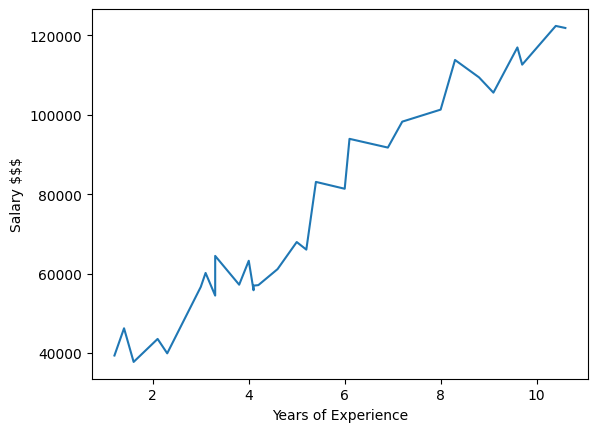

In [139]:
import matplotlib.pyplot as plt
X = df["YearsExperience"].array
Y = df["Salary"].array
plt.plot(X, Y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary $$$")
plt.show()

# Define the model

## Imports

In [140]:
import random

## Linear Model

In [141]:
class Model:
    def __init__(self):
        # initialize weight and bias with random values (0, 1)
        self.weight = random.random()
        self.bias = random.random()
    def predict(self, x):
        # write this yourself using the linear function
        # y = mx + b
        return self.weight * x + self.bias ##
        pass
    def cost(self, true, pred):
        # write this yourself
        # simple mse (mean squared error)
        # (y-^y)**2
        # y denotes true values; ^y denotes predicted values
        return (true - pred) ** 2 ##
        pass
            

# Train Model

Recall from our [article](https://example.org):

![](https://raw.githubusercontent.com/FortumAI/ActivitiesHub/main/gradient_descent_equation.png)


\* alpha is the same as the learning rate (denoted by lr in code)

In [142]:
def train(model, epochs=100, lr=0.05):
    for epoch in range(epochs):
        preds = model.predict(X)
        cost = model.cost(Y, preds).sum() / len(X)
        print("Epoch: " + str(epoch) + " Cost: " + str(cost))
        # decrement weight and bias using formulas above
        # use .sum() to calculate summation
        model.weight -= lr * 1 / len(X) * ((preds - Y) * X).sum() ##
        model.bias -= lr * 1 / len(X) * (preds - Y).sum() ##

In [143]:
model = Model()
train(model)

Epoch: 0 Cost: 6502664204.80961
Epoch: 1 Cost: 5225586911.474851
Epoch: 2 Cost: 4204055730.0175776
Epoch: 3 Cost: 3386862098.4418797
Epoch: 4 Cost: 2733060572.525133
Epoch: 5 Cost: 2209911881.593127
Epoch: 6 Cost: 1791238239.719743
Epoch: 7 Cost: 1456108287.5724838
Epoch: 8 Cost: 1187785599.8930714
Epoch: 9 Cost: 972887934.4395828
Epoch: 10 Cost: 800714985.3076357
Epoch: 11 Cost: 662710868.760338
Epoch: 12 Cost: 552034338.299811
Epoch: 13 Cost: 463215137.74377286
Epoch: 14 Cost: 391879228.41497123
Epoch: 15 Cost: 334529086.60345024
Epoch: 16 Cost: 288368034.04557633
Epoch: 17 Cost: 251159776.26525533
Epoch: 18 Cost: 221116092.37196127
Epoch: 19 Cost: 196807034.16431782
Epoch: 20 Cost: 177089123.19540343
Epoch: 21 Cost: 161047938.62546167
Epoch: 22 Cost: 147952211.64233816
Epoch: 23 Cost: 137217120.2890955
Epoch: 24 Cost: 128374940.74199113
Epoch: 25 Cost: 121051580.65026288
Epoch: 26 Cost: 114947815.648058
Epoch: 27 Cost: 109824286.4234553
Epoch: 28 Cost: 105489502.64967385
Epoch: 29 C

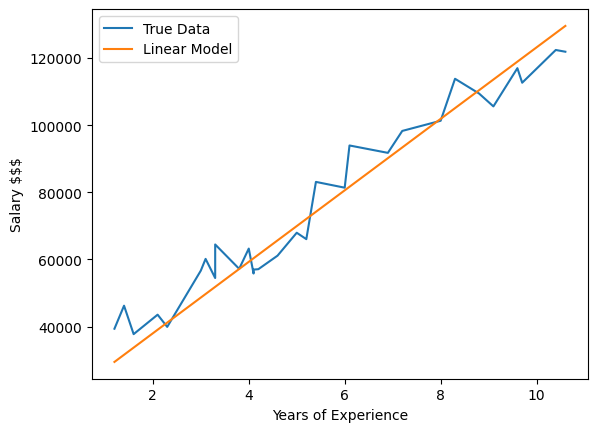

In [144]:
import matplotlib.pyplot as plt
plt.plot(X, Y, label="True Data")
plt.plot(X, model.predict(X), label="Linear Model")
plt.xlabel("Years of Experience")
plt.ylabel("Salary $$$")
plt.legend()
plt.show()

In [145]:
print("Weight: " + str(model.weight))
print("Bias: " + str(model.bias))

Weight: 10649.75193319148
Bias: 16672.177939886024
